# PREDICTING HEART DISEASE USING ML
This notebook looks into using various Pyton-based learning and data science libraries in an attempt to build a model capable of prediciting whether someone has heart_disease or not based on ther medical attributes 

## Problem Definition 
In a statement ,
> Given clinical parameters about a patient , can we predict whether or not they have heart disease?

## DATA
Data taken from CLeavland data from the UCI Machine Leaning Repository https://archive.ics.uci.edu/dataset/45/heart+disease

Its version available on kaggle https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## Evaluation
IF we can reach 85% accuracy at predicting whether or not a patient has heart_disease during the proof of concept ,we'll pursue the project

## Features 
* id (Unique id for each patient)
* 
age (Age of the patient in years)* 
origin (place of study* )
sex (Male/Femal* e)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomati* c])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospit* al))
chol (serum cholesterol in m* g/dl)
fbs (if fasting blood sugar > 120 * mg/dl)
restecg (resting electrocardiographic r* esults)
-- Values: [normal, stt abnormality, lv hype* rtrophy]
thalach: maximum heart rate*  achieved
exang: exercise-induced angina (Tr* ue/ False)
oldpeak: ST depression induced by exercise relat* ive to rest
slope: the slope of the peak exercis* e ST segment
ca: number of major vessels (0-3) colored b* y fluoroscopy
thal: [normal; fixed defect; reve* rsible defect]
num: the pred
Acknowledgements

In [78]:
## Preparing the tools
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns


ModuleNotFoundError: No module named 'xgboost'

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape


(303, 14)

## Data Exploration (exploratory data analysys or EDA)

The goal is here to find out moreabout the data and become a subject matter expert on the data set you're working with
1. What questions are we trying to solve
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how to deal with it ?
4. How can you add change or remove features to get more out of your data

In [3]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

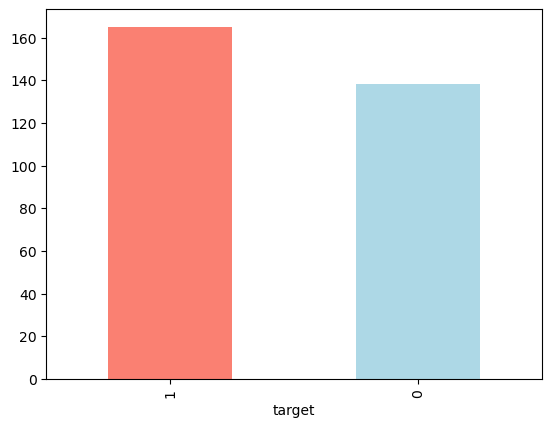

In [4]:
bar =  df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])
plt.show()

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [8]:
pattern_1= pd.crosstab(df.target,df.sex)

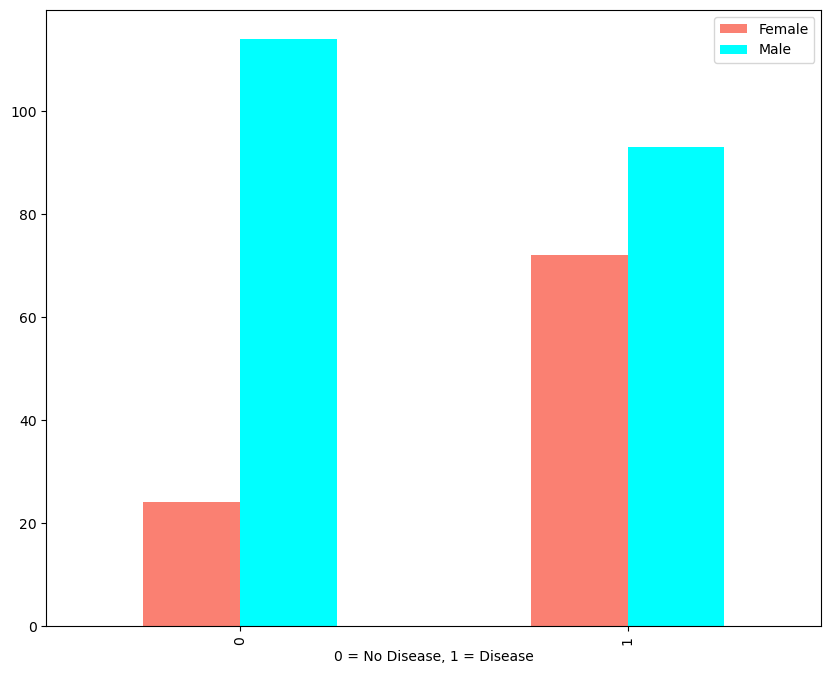

In [9]:
pattern_1.plot(kind="bar",figsize=(10,8),color=["salmon","cyan"])
plt.title=("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.legend(["Female","Male"])
plt.show()

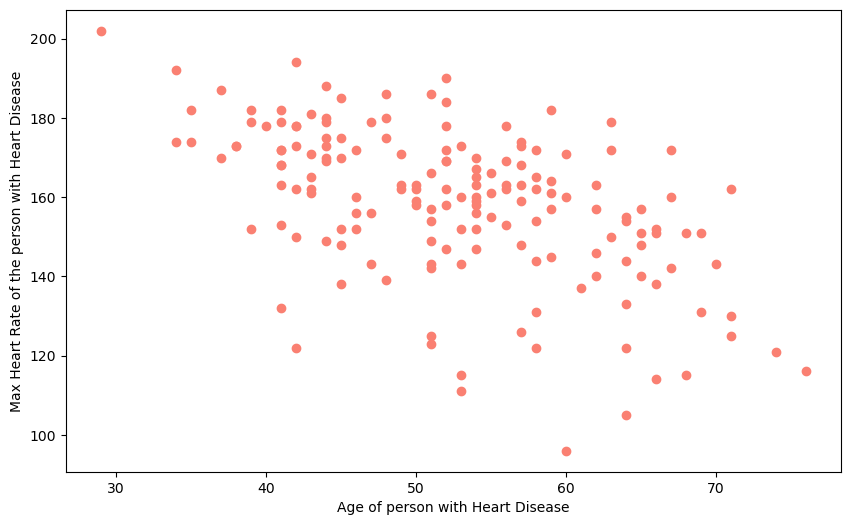

In [10]:
##age vs max_heart rate
#Positive example
plt.figure(figsize =(10,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.xlabel("Age of person with Heart Disease")
plt.ylabel("Max Heart Rate of the person with Heart Disease")
plt.show()

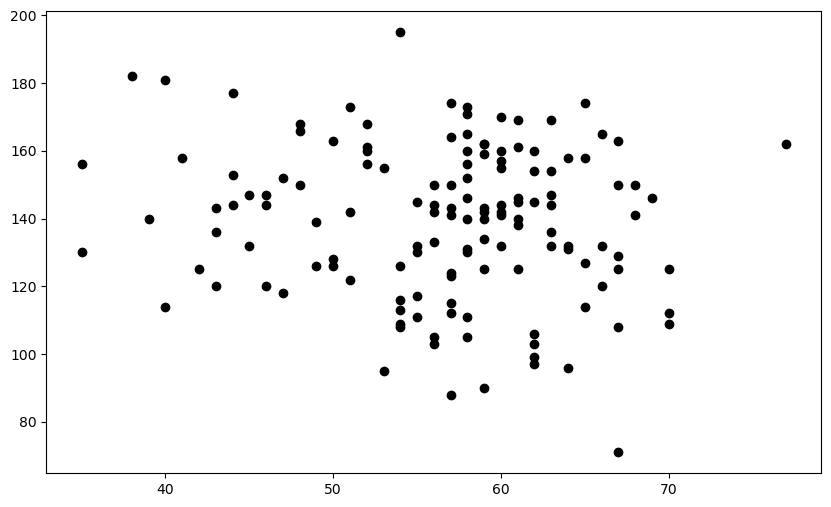

In [11]:
#Negative example
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="black")
plt.show()

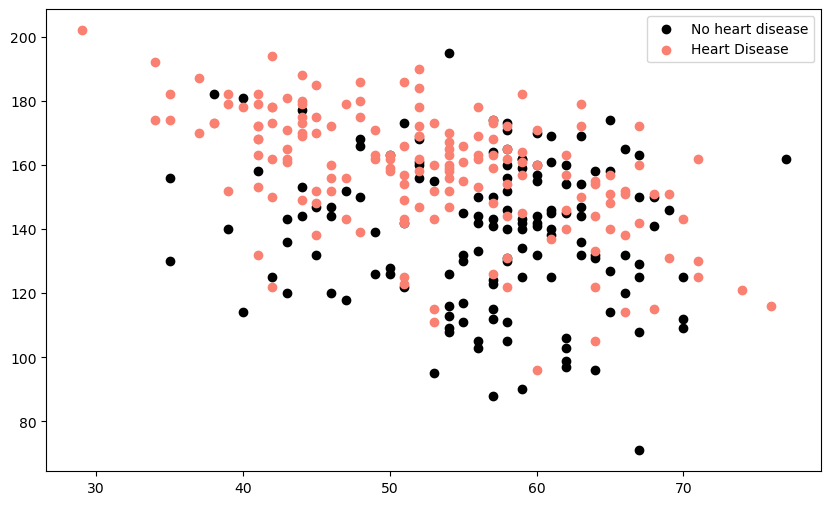

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="black")
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.legend(["No heart disease","Heart Disease"])

plt.show()

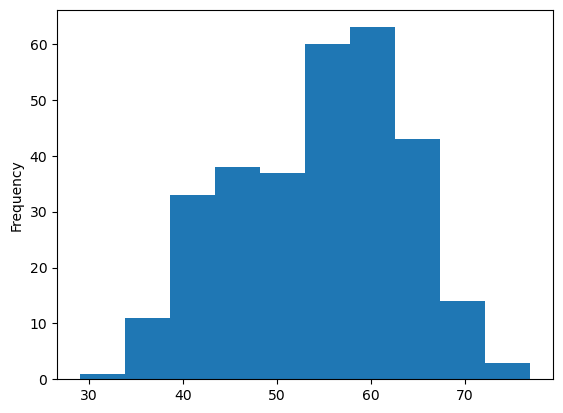

In [13]:
df.age.plot.hist()
plt.show()

In [14]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [15]:
## Heart Disease relation to cp feature of dataset(cp=CHest Pain type)
pattern_2 = pd.crosstab(df.cp,df.target)
pattern_2


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


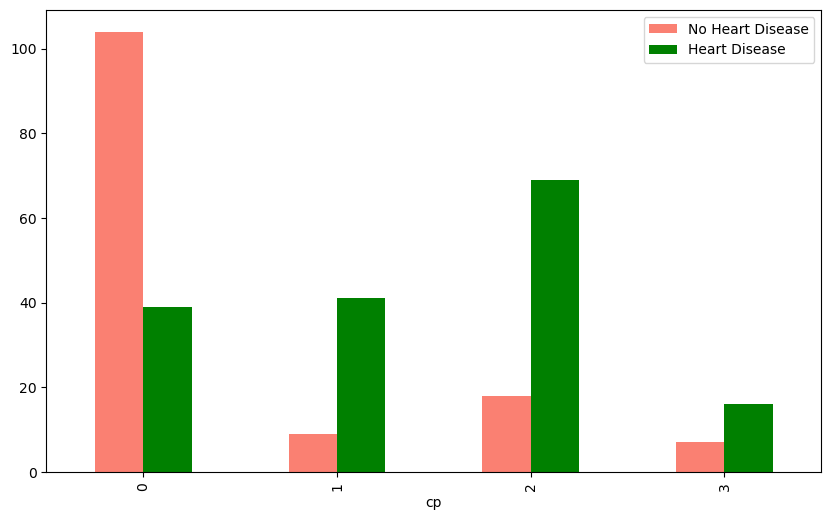

In [16]:
pattern_2.plot(kind="bar",figsize=(10,6),color=["salmon","green"])
plt.legend(["No Heart Disease","Heart Disease"])
plt.show()

In [17]:
## Comparing each individual column to find patterns

#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


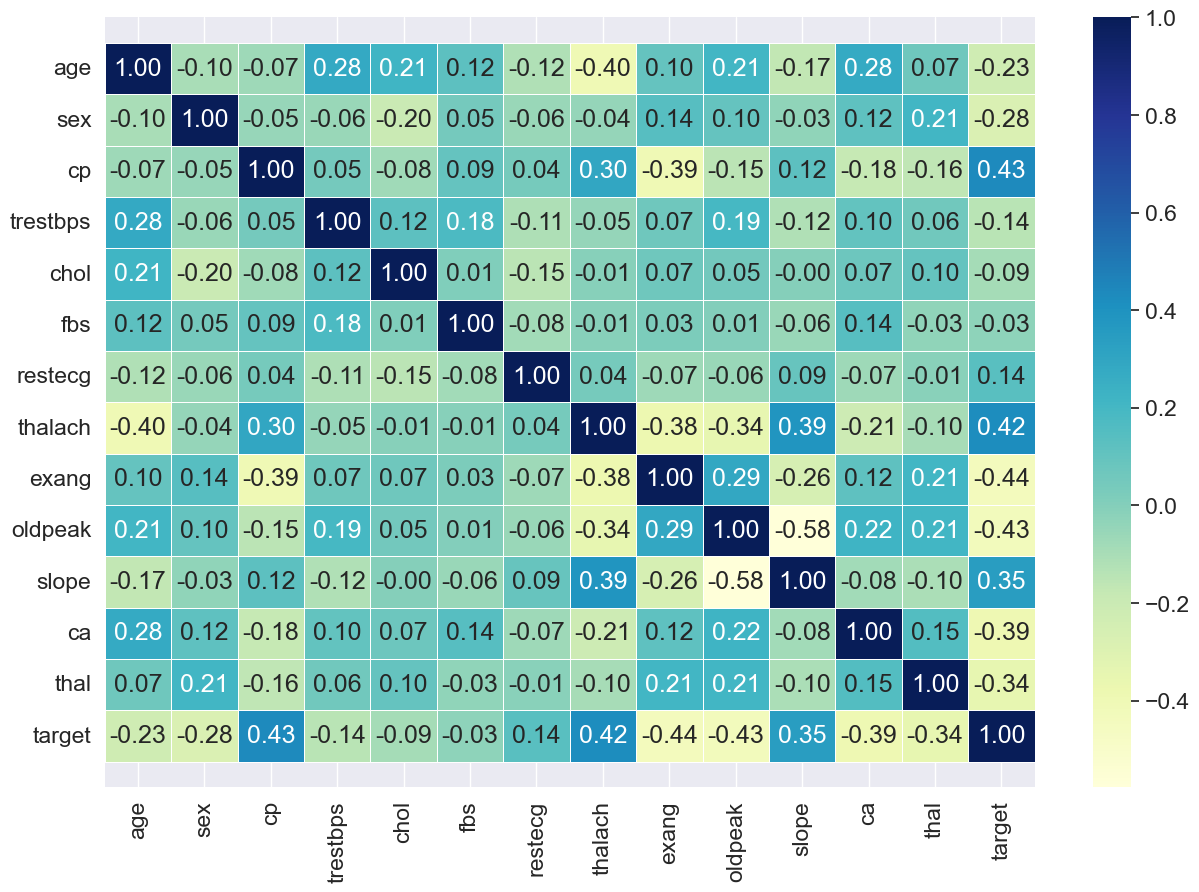

In [44]:
#Let's make our correlation matrix a little more visually appealing
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu"
                )

bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [19]:
df.exang.value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [20]:
pd.crosstab(df.target,df.exang)

exang,0,1
target,,
0,62,76
1,142,23


In [21]:
#Splitting data into x and y
x = df.drop("target",axis=1)
y = df.target
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## We're going to try 3 different machine learning models
1. Logisitic Regression
2. K-Nearest Neighbours CLassifier
3. Random Forest Classifier

In [22]:
# Put models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)     
        model_scores[name] = model.score(x_test,y_test)
    return model_scores
        

In [23]:
model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\KIIT0001\Desktop\heart_disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

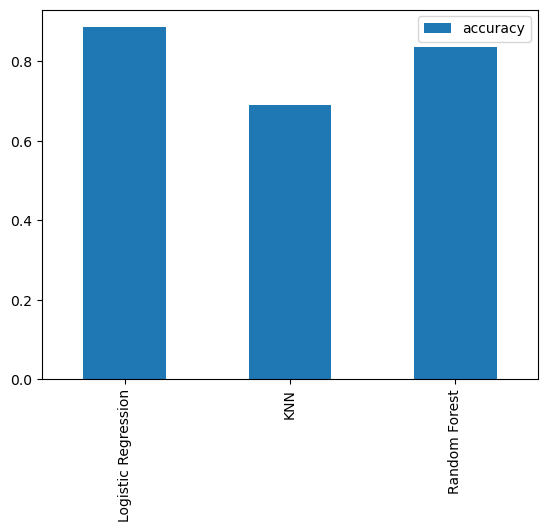

In [24]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

## Tuning and Improving the model

  ## Things we are going to see and try with the model
* Hyperparamter tuning
* Feature Importance 
* Confusion matrix 
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve and Area under the curve

In [25]:
##Hyperparamter tuning 
#Let's tune KNN

train_scores = []
test_scores = []
knn = KNeighborsClassifier()
neighbors = range(1, 21)
#Changing the value of n_neighbpurs r KNN
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(x_train,y_train)
    
    #Updating the train and test scores list
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
train_scores


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [26]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

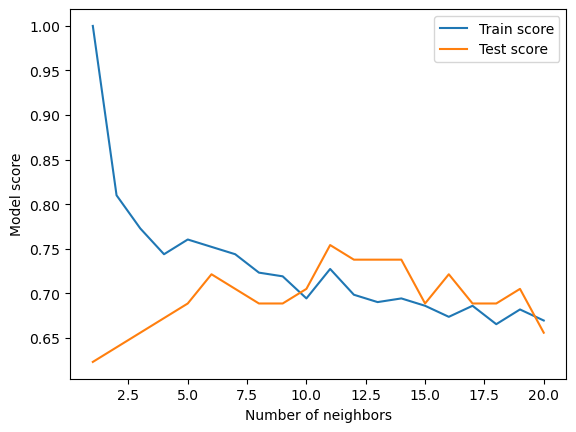

Max KNN score on the test data 75.41%


In [27]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend(["Train score","Test score"])
plt.show()
print(f"Max KNN score on the test data {max(test_scores)*100:.2f}%")

## Hyperparamter tuning with RandomizedSearchCV

To tune 
1. Logistic Regression
2. RandomForestClassifier

In [28]:
#Create a hyperparamter grid for Logistic Regression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

#Create a hyperparameter for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [29]:
#Tuning LogisticRegression 
np.random.seed(42)
rs_log_ref = RandomizedSearchCV(LogisticRegression(),
                               param_distributions =log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameter search model for LogisiticRegression 
rs_log_ref.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_ref.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_ref.score(x_test,y_test)

0.8852459016393442

In [32]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [34]:
rs_rf.score(x_test,y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

In [35]:
#Logistic Regression hypertuning
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True,
                         )
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating the tuning machine for LogisiticRegression model
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve and Area under the curve

In [38]:
#Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

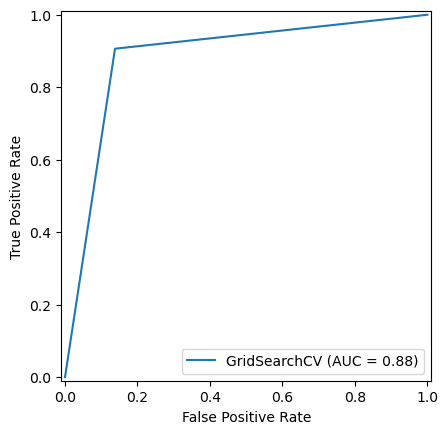

In [40]:
##Plotting ROC curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='GridSearchCV')
display.plot()
plt.show()

In [41]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


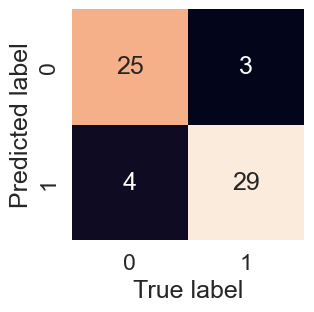

In [42]:
sns.set_theme(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    
    ax = sns.heatmap(confusion_matrix(y_preds,y_test),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom,top = ax.get_ylim()
    ax.set_ylim(bottom,top)
    plt.show()

plot_conf_mat(y_test,y_preds)


    

In [47]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Evaulating the accuracy,precision,recall and f1 using cross_validation

In [53]:
#Model with bestparams we have found 
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [54]:
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [58]:
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [61]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [62]:
cv_recall = cross_val_score(clf,x,y,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [63]:
cv_f1 = cross_val_score(clf,x,y,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

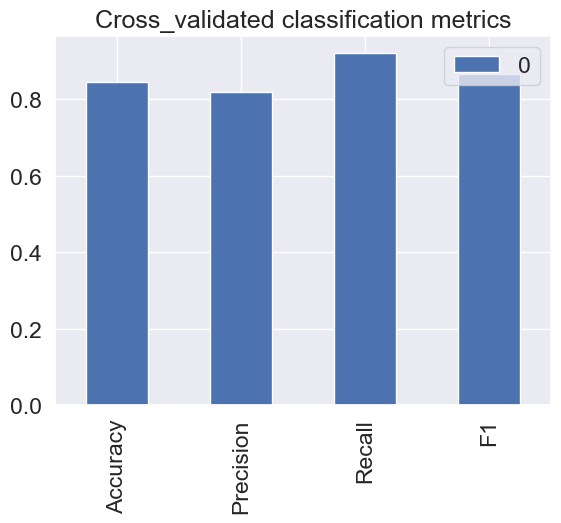

In [65]:
#Visualizing cross-validated metrics
cv_metrics= pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                          "Recall":cv_recall,
                         "F1":cv_f1},index=[0])

cv_metrics.T.plot.bar(title="Cross_validated classification metrics")
plt.show()

### Feature Importance
Feature Importance is another way of asking "which features contributed to the outcomes of the modeland how they contribute"

Finding feature importance is different for each model 

In [68]:
gs_log_reg.best_params_
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(x_train,y_train)

#For LogisticRegression using coef
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [70]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

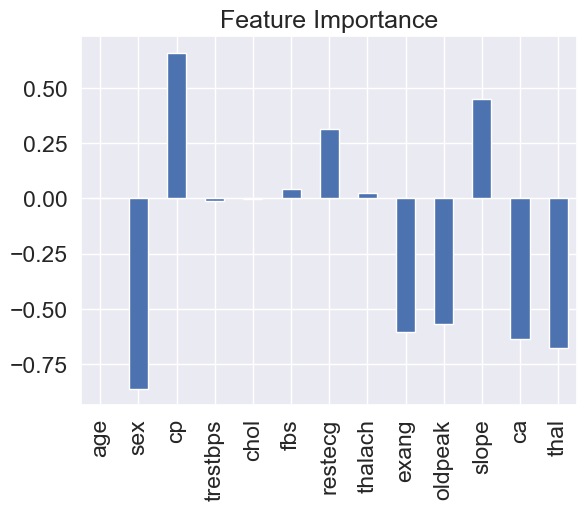

In [74]:
#Visualizing feature importance 
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)
plt.show()

In [75]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope 2 refers to having a downslope:signs of unhealthy heart.People of slope 2 category tend to have a higher ration of getting a heart disease

## Experimentation 

## Trying xgb model

In [77]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=10)
xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

NameError: name 'XGBClassifier' is not defined